<a href="https://colab.research.google.com/github/RhysRoo/Python-Projects/blob/main/MaskedFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
ls

'Algorithms and Ethics.gdoc'
'Architecture and Operating Systems Module '/
'Architecture and Operating Systems Module (Maths)'/
'Colab Notebooks'/
'Copy of Architecture and Operating Systems - Mock Exam .gdoc'
'Copy of Core Computing Slides Week 3 & 4.gslides'
'Copy of DSD Practical - Queries.gdoc'
'Copy of DSD Practical Week Beginning 28th November.gdoc'
'Copy of physical design (1).pptx'
'Copy of Practical 3.gdoc'
'Copy of Practical Week Beginning 5 12 - More Joins.gdoc'
'Copy of Question Sheet - Guest Lecture.gdoc'
'Copy of Sheet 11: IAS Computer.gdoc'
'Copy of Sheet 12: Fetch Execute Cycle  (1).gdoc'
'Copy of Sheet 12: Fetch Execute Cycle .gdoc'
'Copy of Sheet 13: Interconnection.gdoc'
'Copy of Sheet 13_ Interconnection.pdf'
'Copy of Sheet 14: Computer Memory Systems.gdoc'
'Copy of Sheet 14_ Computer Memory Systems.pdf'
'Copy of Sheet 17: Operating Systems 3 (1).gdoc'
'Copy of Sheet 17: Operating Systems 3.gdoc'
'Copy of SQL Summary.gdoc'
'Copy of Tutorial Session 051222.gslides'
'

In [ ]:
cd datasets

/content/drive/MyDrive/datasets


In [ ]:
ls

 __MACOSX/   MMFA/  'TMDB 5000 Movie Dataset'/  'WIDER Face'/  'WIDER Face.zip'


In [ ]:
ls

 __MACOSX/   MMFA/  'TMDB 5000 Movie Dataset'/  'WIDER Face'/  'WIDER Face.zip'


In [ ]:
cd 'WIDER Face'

/content/drive/MyDrive/datasets/WIDER Face


In [ ]:
ls

Testing/  Training/  Validation/


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
train_dataset = '/content/drive/MyDrive/datasets/WIDER Face/Training/images'
test_dataset = '/content/drive/MyDrive/datasets/WIDER Face/Training/images'
validation_dataset = '/content/drive/MyDrive/datasets/WIDER Face/Validation/images'

In [ ]:
!pip install opencv-python matplotlib

In [ ]:
import cv2

In [ ]:
train_data_dir = pathlib.Path('/content/drive/MyDrive/datasets/WIDER Face/Training/images')
batch_size = 55
image_height = 216
image_width = 216

In [ ]:
val_data_dir = pathlib.Path('/content/drive/MyDrive/datasets/WIDER Face/Validation/images')
batch_size = 55
image_height = 216
image_width = 216

In [ ]:
test_data_dir = pathlib.Path('/content/drive/MyDrive/datasets/WIDER Face/Validation/images')
batch_size = 55
image_height = 216
image_width = 216

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)


Found 12880 files belonging to 61 classes.
Using 11592 files for training.


In [ ]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

Found 12880 files belonging to 61 classes.
Using 1288 files for validation.


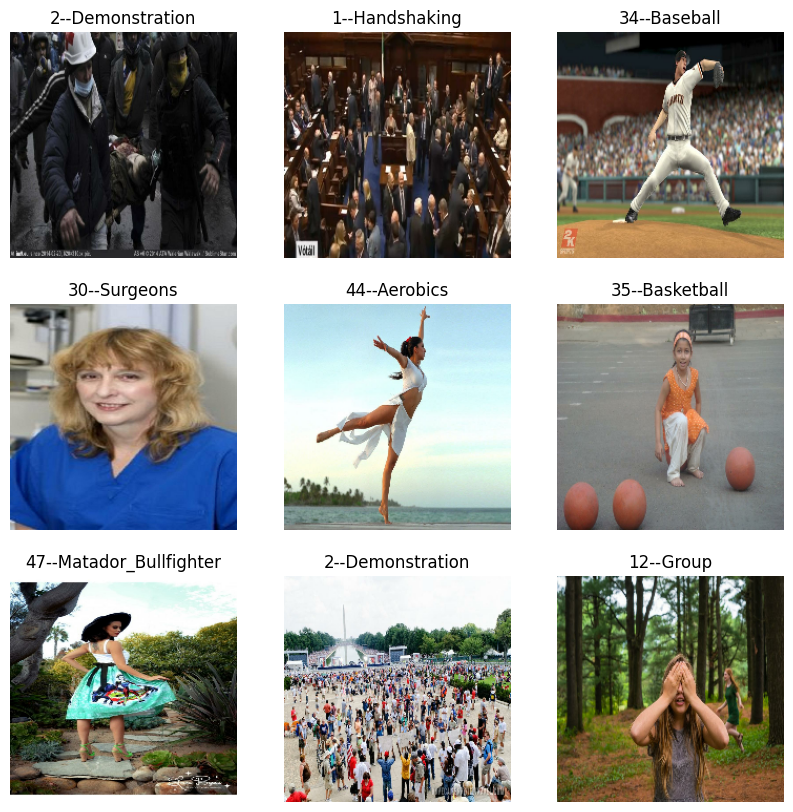

In [ ]:
# %time
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
num_classes = 61
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 216, 216, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 216, 216, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 108, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        1

In [ ]:
model.compile(optimizer='Adam'
    , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    , metrics=['accuracy'])

In [ ]:
epochs=10
history=model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
211/211 [==============================] - 1888s 9s/step - loss: 3.8820 - accuracy: 0.0920 - val_loss: 3.7708 - val_accuracy: 0.1149
Epoch 2/10
211/211 [==============================] - 79s 362ms/step - loss: 3.5863 - accuracy: 0.1501 - val_loss: 3.6303 - val_accuracy: 0.1374
Epoch 3/10
211/211 [==============================] - 80s 367ms/step - loss: 3.1219 - accuracy: 0.2293 - val_loss: 3.7629 - val_accuracy: 0.1615
Epoch 4/10
211/211 [==============================] - 75s 347ms/step - loss: 2.2501 - accuracy: 0.4217 - val_loss: 4.5378 - val_accuracy: 0.1343
Epoch 5/10
211/211 [==============================] - 79s 364ms/step - loss: 1.1886 - accuracy: 0.6813 - val_loss: 5.9927 - val_accuracy: 0.1219
Epoch 6/10
211/211 [==============================] - 81s 372ms/step - loss: 0.5502 - accuracy: 0.8504 - val_loss: 8.1006 - val_accuracy: 0.1141
Epoch 7/10
211/211 [==============================] - 80s 370ms/step - loss: 0.2926 - accuracy: 0.9220 - val_loss: 9.2613 - val_acc

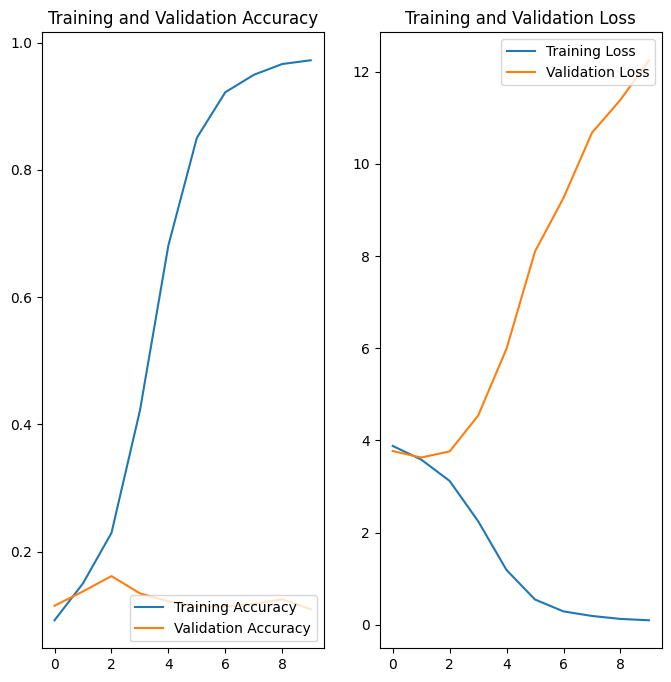

In [ ]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
print(f"Max score index: {np.argmax(61)}, Number of classes: {len(class_names)}")
title = "{} - {} %".format(class_names[np.argmax(61)], 10)

Max score index: 0, Number of classes: 61


In [ ]:
model.save('my_model.keras')

1/1 [==============================] - 0s 51ms/step


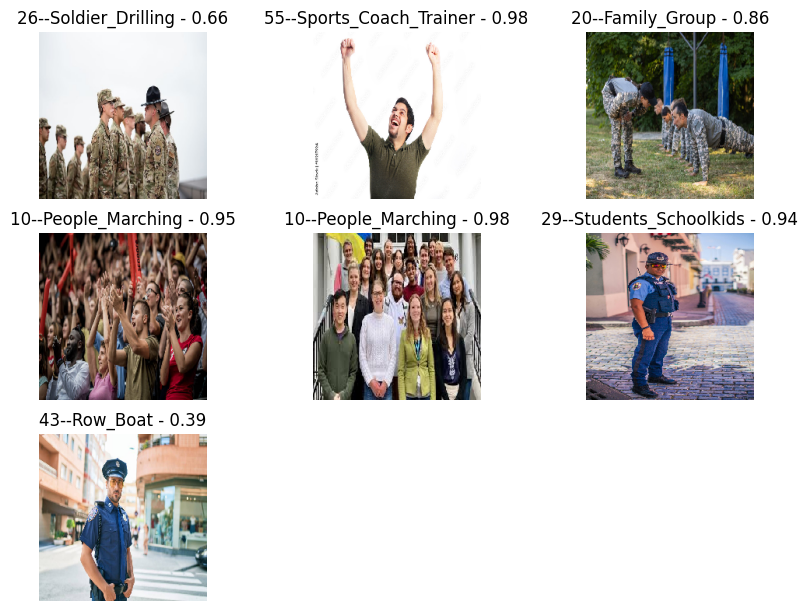

In [ ]:
# Test the model on new images
test_dir = pathlib.Path('/content/drive/MyDrive/datasets/test_dataset')
test_paths = list(test_dir.glob('*.jpg'))

plt.figure(figsize=(10, 10))

for i, test_path in enumerate(test_paths):
    test_img = keras.preprocessing.image.load_img(test_path, target_size=(216, 216))
    img_arr = keras.preprocessing.image.img_to_array(test_img)
    img_arr = tf.expand_dims(img_arr, 0)

    predictions = model.predict(img_arr)

    score = tf.nn.softmax(predictions[0])
    percent = int(round(100*np.max(score), 0))
    title = "{} - {:.2f}".format(class_names[np.argmax(score)], np.max(score))

    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(test_img)
    plt.title(title)
    plt.axis("off")

plt.show()